# Spatial VAE Test

## Setting up enviroment

In [1]:
cd ../..

C:\Users\hp\Desktop\University of Southampton\MSc AI\Semester 2\Deep Learning\Challenge\spatial_vae\reproducibility


In [2]:
import os
import sys
import torch
import torchvision
from argparse import Namespace
import pytorch_lightning as pl
from pytorch_lightning.logging import TensorBoardLogger 
from pytorch_lightning.callbacks import ModelCheckpoint
from tqdm import tqdm
from ipywidgets import HBox
from src.models.pl_model import Model
from matplotlib import pyplot as plt

In [3]:
%load_ext tensorboard
%tensorboard --logdir src/models/log/tb_logs --host localhost

Reusing TensorBoard on port 6006 (pid 19356), started 0:01:34 ago. (Use '!kill 19356' to kill it.)

## Training

In [4]:
params = dict(dataset ='MNIST',
              width=28,
              height=28,
              n_channels=1,
              n_hidden_units=3,
              n_layers=4,
              n_unconstrained=2)
specs = Namespace(**params)
model = Model(specs.dataset, specs.width, specs.height, specs.n_channels,
              specs.n_hidden_units, specs.n_layers, specs.n_unconstrained)
checkpoint_callback = ModelCheckpoint(filepath='src/models/log/')
logger = TensorBoardLogger("src/models/log/tb_logs", name="spatial_vae_report")
trainer = pl.Trainer(train_percent_check=0.05, max_epochs=100, checkpoint_callback=checkpoint_callback, 
                     logger=logger)  
# pt.trainer(gpus=1) in order to use GPU instead of CPU
trainer.fit(model)

C:\Users\hp\Anaconda3\envs\pysyft\lib\site-packages\pytorch_lightning\loggers\tensorboard.py:106: UserWarning: Hyperparameter logging is not available for Torch version 1.1.0. Skipping log_hyperparams. Upgrade to Torch 1.3.0 or above to enable hyperparameter logging.
  f"Hyperparameter logging is not available for Torch version {torch.__version__}."
INFO:lightning:
  | Name       | Type       | Params
--------------------------------------
0 | activation | Tanh       | 0     
1 | encoder    | Sequential | 2 K   
2 | encoder.0  | Linear     | 2 K   
3 | encoder.2  | Linear     | 40    
4 | decoder    | Sequential | 19    
5 | decoder.0  | Linear     | 15    
6 | decoder.2  | Linear     | 4     
7 | decoder.3  | Sigmoid    | 0     


C:\Users\hp\Anaconda3\envs\pysyft\lib\site-packages\pytorch_lightning\utilities\warnings.py:18: RuntimeWarning: Displayed epoch numbers in the progress bar start from "1" until v0.6.x, but will start from "0" in v0.8.0.
  warnings.warn(*args, **kwargs)


INFO:lightning:Detected KeyboardInterrupt, attempting graceful shutdown...


1

## Loading trained model for inference

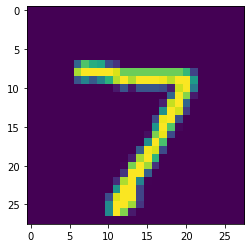

In [7]:
# Predicting on new random data
model = Model.load_from_checkpoint("src/models/log/_ckpt_epoch_8.ckpt", **params)
#mnist_val = torch.randn(1, 28, 28)
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_val = torchvision.datasets.MNIST('src/data/mnist/', train=False, download=True, transform=transform)
# print('\n'.join([''.join(['{:4}'.format(item) for item in row]) 
#       for row in mnist_val.data[0]
#                 ]))
plt.imshow(mnist_val.data[0].numpy(), interpolation='nearest')
plt.show()

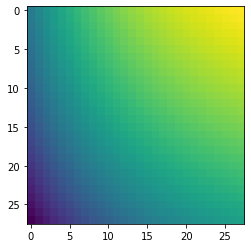

In [8]:
# The model has been trained for 10 epochs on just 5% of the training data since I was running this example
# on my local machine CPU (therefore this prediction can't be considered demonstrative of the model full potential)
out, _, _ = model(mnist_val[0][0])
plt.imshow(out[0][0].detach().numpy(), interpolation='nearest')
plt.show()

The same procedure can then be applied to any of the other 3 datasets: MNIST_Rotated, MNIST_Translated, Galaxy_Zoo (when using Galaxy_Zoo, make sure to used the right image sizes and number of channels as shown below). 

In [ ]:
# params = dict(dataset ='Galaxy_Zoo',
#               width=64,
#               height=64,
#               n_channels=3,
#               n_hidden_units=3,
#               n_layers=4,
#               n_unconstrained=2)
# specs = Namespace(**params)
# model = Model(specs.dataset, specs.width, specs.height, specs.n_channels,
#               specs.n_hidden_units, specs.n_layers, specs.n_unconstrained)
# checkpoint_callback = ModelCheckpoint(filepath='src/models/log/')
# logger = TensorBoardLogger("src/models/log/tb_logs", name="spatial_vae_report")
# trainer = pl.Trainer(train_percent_check=0.05, max_epochs=100, checkpoint_callback=checkpoint_callback, 
#                      logger=logger)  
# # pt.trainer(gpus=1) in order to use GPU instead of CPU
# trainer.fit(model)